In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load the data
df = pd.read_csv('/home/sunbeam/Documents/ML/ml-o-02-data/ML-02-master/day14/Mall_Customers.csv')

In [2]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [3]:
# find x
x = df.iloc[:, [3, 4]].values
# print(x)

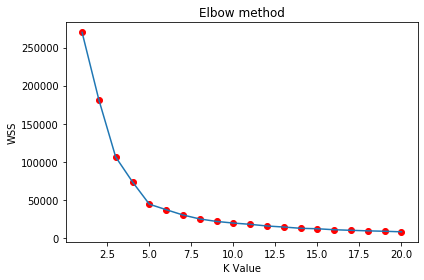

In [5]:
def find_optimal_k():
    wss = []
    for index in range(1, 21):
        kmeans = KMeans(n_clusters=index)
        kmeans.fit(x)
        # inertia_ is the WSS value for k = index
        wss.append(kmeans.inertia_)
    # print(wss)

    plt.scatter(range(1, 21), wss, color="red")
    plt.plot(range(1, 21), wss)
    plt.xlabel('K Value')
    plt.ylabel('WSS')
    plt.title('Elbow method')
    plt.tight_layout()
    plt.show()
find_optimal_k()

In [6]:
# find the clusters
def find_clusters(k):
    colors = ['red', 'green', 'yellow', 'brown', 'cyan', 'magenta', 'blue', 'purple']

    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(x)

    print(clusters)
    print(kmeans.cluster_centers_)

    # visualization
    # plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], color="red", label="Cluster 0")
    # plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], color="green", label="Cluster 1")
    # plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], color="yellow", label="Cluster 2")
    # plt.scatter(x[clusters == 3, 0], x[clusters == 3, 1], color="brown", label="Cluster 3")
    # plt.scatter(x[clusters == 4, 0], x[clusters == 4, 1], color="magenta", label="Cluster 4")
    # plt.scatter(x[clusters == 5, 0], x[clusters == 5, 1], color="cyan", label="Cluster 5")

    for index in range(k):
        plt.scatter(x[clusters == index, 0], x[clusters == index, 1], color=colors[index], label=f"Cluster {index + 1}")

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")

    plt.title('Clusters of customers')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.tight_layout()
    plt.legend()
    plt.show()


find_clusters(5)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]
[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]
